In [114]:
import pandas as pd
import requests
from datetime import date,datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

In [7]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11744604,Guardians of Life,2020,3.0
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN


In [36]:
type(dfMovies)

pandas.core.frame.DataFrame

In [12]:
dfStatsMoviesByYear = pd.read_json('http://localhost:8000/movies/stats_by_year')
dfStatsMoviesByYear

,0,1,2,3
0,1915,50,50,50.0000
1,1916,50,50,50.0000
2,1917,50,50,50.0000
3,1918,50,60,51.0000
4,1919,50,57,50.7000
...,...,...,...,...
101,2016,3,161,97.6667
102,2017,3,164,95.8636
103,2018,1,149,98.4000
104,2019,2,209,104.3333


In [13]:
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'name': 'Alfred Hitchcock', 'birthdate': '189...",60
1,"{'name': 'Martin Scorsese', 'birthdate': '1942...",48
2,"{'name': 'Steven Spielberg', 'birthdate': '194...",41
3,"{'name': 'Clint Eastwood', 'birthdate': '1930-...",39
4,"{'name': 'Brian De Palma', 'birthdate': '1940-...",38
5,"{'name': 'Ridley Scott', 'birthdate': '1937-11...",35
6,"{'name': 'John Woo', 'birthdate': '1946-09-22'...",34
7,"{'name': 'Steve McQueen', 'birthdate': '1969-1...",31
8,"{'name': 'Sam Raimi', 'birthdate': '1959-10-23...",31
9,"{'name': 'John Ford', 'birthdate': None, 'id':...",20


In [33]:
response  = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [34]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error',response.status_code,response.json(), sep=', ')

Response OK


In [35]:
data_json = response.json()
data_json

[[{'name': 'Alfred Hitchcock', 'birthdate': '1899-08-13', 'id': 33}, 60],
 [{'name': 'Martin Scorsese', 'birthdate': '1942-11-17', 'id': 217}, 48],
 [{'name': 'Steven Spielberg', 'birthdate': '1946-12-18', 'id': 229}, 41],
 [{'name': 'Clint Eastwood', 'birthdate': '1930-05-31', 'id': 142}, 39],
 [{'name': 'Brian De Palma', 'birthdate': '1940-09-11', 'id': 361}, 38],
 [{'name': 'Ridley Scott', 'birthdate': '1937-11-30', 'id': 631}, 35],
 [{'name': 'John Woo', 'birthdate': '1946-09-22', 'id': 247}, 34],
 [{'name': 'Steve McQueen', 'birthdate': '1969-10-09', 'id': 2588606}, 31],
 [{'name': 'Sam Raimi', 'birthdate': '1959-10-23', 'id': 600}, 31],
 [{'name': 'John Ford', 'birthdate': None, 'id': 406}, 20],
 [{'name': 'Peter Jackson', 'birthdate': '1961-10-31', 'id': 1392}, 19],
 [{'name': 'Danny Boyle', 'birthdate': '1956-10-20', 'id': 965}, 18],
 [{'name': 'Walter Edwards', 'birthdate': None, 'id': 250445}, 14],
 [{'name': 'James Cameron', 'birthdate': '1954-08-16', 'id': 116}, 14],
 [{'na

In [39]:
data_flatten = [ [director_dict['id'],director_dict['name'],director_dict['birthdate'],movie_count] for director_dict, movie_count in data_json]
data_flatten

[[33, 'Alfred Hitchcock', '1899-08-13', 60],
 [217, 'Martin Scorsese', '1942-11-17', 48],
 [229, 'Steven Spielberg', '1946-12-18', 41],
 [142, 'Clint Eastwood', '1930-05-31', 39],
 [361, 'Brian De Palma', '1940-09-11', 38],
 [631, 'Ridley Scott', '1937-11-30', 35],
 [247, 'John Woo', '1946-09-22', 34],
 [2588606, 'Steve McQueen', '1969-10-09', 31],
 [600, 'Sam Raimi', '1959-10-23', 31],
 [406, 'John Ford', None, 20],
 [1392, 'Peter Jackson', '1961-10-31', 19],
 [965, 'Danny Boyle', '1956-10-20', 18],
 [250445, 'Walter Edwards', None, 14],
 [116, 'James Cameron', '1954-08-16', 14],
 [233, 'Quentin Tarantino', '1963-03-27', 14],
 [634240, 'Christopher Nolan', '1970-07-30', 13],
 [102908, 'Robert N. Bradbury', None, 13],
 [94435, 'Bong Joon Ho', '1969-09-14', 12],
 [1053, 'Ethan Coen', '1957-09-21', 12],
 [1054, 'Joel Coen', '1954-11-29', 11]]

In [45]:
data_flatten = [ {**director_dict, 'movie_count':movie_count} for director_dict, movie_count in data_json]
data_flatten

[{'name': 'Alfred Hitchcock',
  'birthdate': '1899-08-13',
  'id': 33,
  'movie_count': 60},
 {'name': 'Martin Scorsese',
  'birthdate': '1942-11-17',
  'id': 217,
  'movie_count': 48},
 {'name': 'Steven Spielberg',
  'birthdate': '1946-12-18',
  'id': 229,
  'movie_count': 41},
 {'name': 'Clint Eastwood',
  'birthdate': '1930-05-31',
  'id': 142,
  'movie_count': 39},
 {'name': 'Brian De Palma',
  'birthdate': '1940-09-11',
  'id': 361,
  'movie_count': 38},
 {'name': 'Ridley Scott',
  'birthdate': '1937-11-30',
  'id': 631,
  'movie_count': 35},
 {'name': 'John Woo', 'birthdate': '1946-09-22', 'id': 247, 'movie_count': 34},
 {'name': 'Steve McQueen',
  'birthdate': '1969-10-09',
  'id': 2588606,
  'movie_count': 31},
 {'name': 'Sam Raimi',
  'birthdate': '1959-10-23',
  'id': 600,
  'movie_count': 31},
 {'name': 'John Ford', 'birthdate': None, 'id': 406, 'movie_count': 20},
 {'name': 'Peter Jackson',
  'birthdate': '1961-10-31',
  'id': 1392,
  'movie_count': 19},
 {'name': 'Danny Bo

In [46]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [66]:
dfStatsMovieByDirector.loc[33].birthdate

datetime.date(1899, 8, 13)

In [55]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [57]:
date.fromisoformat('1899-08-13')

datetime.date(1899, 8, 13)

In [63]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(date.fromisoformat)

id
33         1899-08-13
217        1942-11-17
229        1946-12-18
142        1930-05-31
361        1940-09-11
631        1937-11-30
247        1946-09-22
2588606    1969-10-09
600        1959-10-23
1392       1961-10-31
965        1956-10-20
116        1954-08-16
233        1963-03-27
634240     1970-07-30
94435      1969-09-14
1053       1957-09-21
1054       1954-11-29
Name: birthdate, dtype: object

In [65]:
dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(lambda bd: date.fromisoformat(bd) if bd is not None else None)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [74]:
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


Partie graphique
-

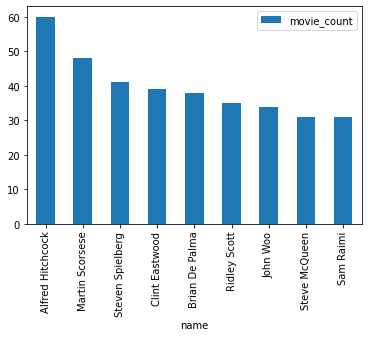

In [101]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

In [84]:
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values

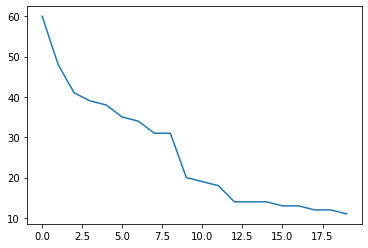

In [85]:
# plot, bar, piechart, ...
plt.plot(movie_count_ndarray)

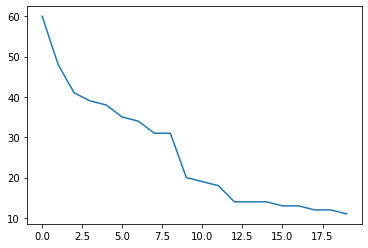

In [88]:
#fig : ensemble du dessin
#ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5, 1.0, 'diag bar')

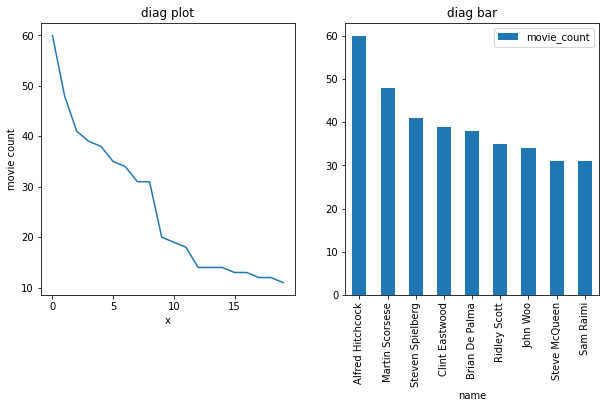

In [136]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('diag plot')
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.plot(movie_count_ndarray)

statsToPlot.plot(kind='bar',ax=ax2)
ax2.set_title('diag bar')

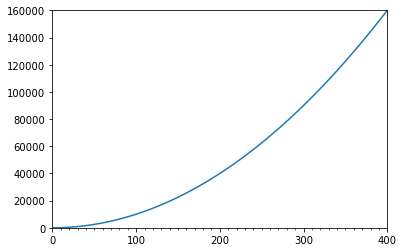

In [131]:
x = np.arange(1000)
y = x**2+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,400)
ax.set_ylim(0,160000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

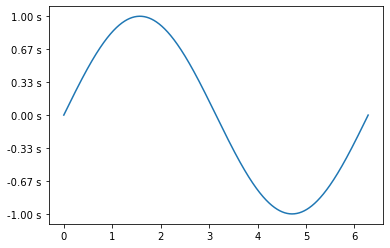

In [135]:
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
#ax.set_xlim(0,400)
#ax.set_ylim(0,160000)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

In [ ]:
mdates.YearLocator()
mdates.MonthLocator()
mdates.DayLocator()
mdates.DateFormatter('%Y-%m')